# Imports and setting up viz

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
import sys
sys.path.append('../../python_tools/')
from tools import *
from tools_routing import *

# Load files
File to evaluate the behaviour of native routing compared to standard.

First working on the same topographic grid (0.5°).

3 files are considered : one from the standard routing simulation, 2 from the native routing simulation (sechiba_history, diag_routing_r)

In [2]:
dir='../../../JZ_simu_outputs/routing_native'

In [3]:
spinupyears=[2000,2001,2002]
# spinupyears=[]

In [4]:
#open netcdf files for standard routing
filename = '{}/eval_halfdeg/nat7.1/MO/nat7.1_*_1M_sechiba_history.nc'.format(dir)
std_noirr = xr.open_mfdataset(filename)
std_noirr = std_noirr.rename({'time_counter' : 'time'})
std_noirr.attrs['name'] = 'Subgrid_halfdeg routing (0.5° DEM)'

#remove first years to consider a spinup
std_noirr = remove_years_efficiently(std_noirr, spinupyears)

std_noirr

<xarray.Dataset> Size: 5GB
Dimensions:                 (time: 3653, axis_nbounds: 2, lat: 36, lon: 38,
                             solay: 11, veget: 15, nobio: 1)
Coordinates:
  * lat                     (lat) float32 144B 27.25 27.75 28.25 ... 44.25 44.75
  * lon                     (lon) float32 152B -14.75 -14.25 ... 3.25 3.75
  * solay                   (solay) float32 44B 0.0 0.001955 ... 0.999 2.0
  * veget                   (veget) float32 60B 1.0 2.0 3.0 ... 13.0 14.0 15.0
  * nobio                   (nobio) float32 4B 1.0
    time_centered           (time) datetime64[ns] 29kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time                    (time) datetime64[ns] 29kB 2003-01-01T12:00:00 .....
Dimensions without coordinates: axis_nbounds
Data variables: (12/70)
    time_centered_bounds    (time, axis_nbounds) datetime64[ns] 58kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time, axis_nbounds) datetime64[ns] 58kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   (time, lat, lon) float32 20MB dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    Contfrac                (time, lat, lon) float32 20MB dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    evap                    (time, lat, lon) float32 20MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    coastalflow             (time, lat, lon) float32 20MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    ...                      ...
    humrel                  (time, veget, lat, lon) float32 300MB dask.array<chunksize=(1, 15, 36, 38), meta=np.ndarray>
    mrsos                   (time, lat, lon) float32 20MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    mrso                    (time, lat, lon) float32 20MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    LAImean                 (time, lat, lon) float32 20MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    snowtemp_weighted       (time, lat, lon) float32 20MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    frac_snow               (time, lat, lon) float32 20MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
Attributes:
    name:         Subgrid_halfdeg routing (0.5° DEM)
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Jan-26 16:07:13 GMT
    uuid:         a165ac95-4725-40e6-b8fb-7b8a30bd96f6
    LongName:     Ref config with new driver, WFDEI/v2 halfdeg, and VEGET_UPD...

In [5]:
#open netcdf files for native routing on ORC grid
# filename = 'nat8.1/MO/nat8.1_*_1M_sechiba_history.nc'
filename = '{}/eval_halfdeg/nat14/MO/nat14_*_1M_sechiba_history.nc'.format(dir)
natORC_noirr = xr.open_mfdataset(filename)
natORC_noirr = natORC_noirr.rename({'time_counter' : 'time'})
natORC_noirr.attrs['name'] = 'Interp_topo routing (0.5° DEM)'

natORC_noirr = remove_years_efficiently(natORC_noirr, spinupyears)

natORC_noirr

<xarray.Dataset> Size: 5GB
Dimensions:                 (time: 3653, axis_nbounds: 2, lat: 36, lon: 38,
                             solay: 11, veget: 15, nobio: 1)
Coordinates:
  * lat                     (lat) float32 144B 27.25 27.75 28.25 ... 44.25 44.75
  * lon                     (lon) float32 152B -14.75 -14.25 ... 3.25 3.75
  * solay                   (solay) float32 44B 0.0 0.001955 ... 0.999 2.0
  * veget                   (veget) float32 60B 1.0 2.0 3.0 ... 13.0 14.0 15.0
  * nobio                   (nobio) float32 4B 1.0
    time_centered           (time) datetime64[ns] 29kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time                    (time) datetime64[ns] 29kB 2003-01-01T12:00:00 .....
Dimensions without coordinates: axis_nbounds
Data variables: (12/67)
    time_centered_bounds    (time, axis_nbounds) datetime64[ns] 58kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds     (time, axis_nbounds) datetime64[ns] 58kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    Areas                   (time, lat, lon) float32 20MB dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    Contfrac                (time, lat, lon) float32 20MB dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    evap                    (time, lat, lon) float32 20MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    coastalflow             (time, lat, lon) float32 20MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    ...                      ...
    humrel                  (time, veget, lat, lon) float32 300MB dask.array<chunksize=(1, 15, 36, 38), meta=np.ndarray>
    mrsos                   (time, lat, lon) float32 20MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    mrso                    (time, lat, lon) float32 20MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    LAImean                 (time, lat, lon) float32 20MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    snowtemp_weighted       (time, lat, lon) float32 20MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    frac_snow               (time, lat, lon) float32 20MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
Attributes:
    name:         Interp_topo routing (0.5° DEM)
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-01 13:47:52 GMT
    uuid:         9dd2c0bf-21ec-4a96-bd13-e125f9985bca
    LongName:     Ref config with new driver, WFDEI/v2 halfdeg, and VEGET_UPD...

In [6]:
#open netcdf files for native routing diag_routing_r (regridded to 38x36)
# filename = 'nat8.1/routing_native_grid_regridded/nat8.1_*.nc'
filename = '{}/eval_halfdeg/nat14/DA/nat14_*routing_r.nc'.format(dir)
natDIAGR_noirr = xr.open_mfdataset(filename)
#Rename variables 
dict = {'time_counter' : 'time',
        'routing_stream_reservoir_r' : 'streamr',
        'routing_fast_reservoir_r' : 'fastr',
        'routing_slow_reservoir_r' : 'slowr',
        'routing_drainage_r' : 'drainage',
        'routing_runoff_r' : 'runoff',
        'routing_hydrographs_r' : 'hydrographs',
        'routing_riverflow_r' : 'riverflow',
        'routing_coastalflow_r' : 'coastalflow'}
#change the variables that exist according to the dictionary
natDIAGR_noirr = natDIAGR_noirr.rename(dict)

#remove first and last longitude and latitude
natDIAGR_noirr = natDIAGR_noirr.isel(lon=slice(2,-2),lat=slice(2,-2))
#change name attribute
natDIAGR_noirr.attrs['name'] = 'Interp_topo routing (0.5° DEM)'

#remove first years to consider a spinup
natDIAGR_noirr = remove_years_efficiently(natDIAGR_noirr, spinupyears)


natDIAGR_noirr

<xarray.Dataset> Size: 566MB
Dimensions:                (time: 3653, axis_nbounds: 2, lat: 36, lon: 38,
                            basins: 200)
Coordinates:
  * lat                    (lat) float32 144B 44.75 44.25 43.75 ... 27.75 27.25
  * lon                    (lon) float32 152B -14.75 -14.25 -13.75 ... 3.25 3.75
  * basins                 (basins) |S255 51kB b'Amazon\x00                  ...
    time_instant           (time) datetime64[ns] 29kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time                   (time) datetime64[ns] 29kB 2003-01-01T12:00:00 ......
    time_centered          (time) datetime64[ns] 29kB dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/18)
    time_instant_bounds    (time, axis_nbounds) datetime64[ns] 58kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds    (time, axis_nbounds) datetime64[ns] 58kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_centered_bounds   (time, axis_nbounds) datetime64[ns] 58kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    flow_r                 (time, lat, lon) float64 40MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    runoff                 (time, lat, lon) float64 40MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_lakeinflow_r   (time, lat, lon) float64 40MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    ...                     ...
    hydrographs            (time, lat, lon) float64 40MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    irrig_netereq_r        (time, lat, lon) float64 40MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_irrigation_r   (time, lat, lon) float64 40MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    basins_riverflow       (time, basins) float64 6MB dask.array<chunksize=(1, 200), meta=np.ndarray>
    routing_basins_area    (time, lat, lon) float64 40MB dask.array<chunksize=(365, 36, 38), meta=np.ndarray>
    routing_stream_diag_r  (time, lat, lon) float64 40MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
Attributes:
    name:         Interp_topo routing (0.5° DEM)
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-01 13:47:53 GMT
    uuid:         d24203e9-83c1-4595-a282-a23274992ada

In [24]:
filename = '{}/eval_halfdeg/nat14/DA/nat14_*_routing.nc'.format(dir)
natDIAG_noirr = xr.open_mfdataset(filename)
dict = {'time_counter' : 'time',
        # 'lat_domain_landpoints_routing':'lat',
        # 'lon_domain_landpoints_routing':'lon',
        'lat_domain_landpoints':'lat',
        'lon_domain_landpoints':'lon',
        'routing_stream_reservoir' : 'streamr',
        'routing_fast_reservoir' : 'fastr',
        'routing_slow_reservoir' : 'slowr',
        'routing_drainage' : 'drainage',
        'routing_runoff' : 'runoff',
        'routing_riverflow' : 'riverflow',
        'routing_coastalflow' : 'coastalflow'}
#change the variables that exist according to the dictionary
natDIAG_noirr = natDIAG_noirr.rename(dict)

natDIAG_noirr.attrs['name'] = 'Interp_topo routing (0.5° DEM)'

#remove first years to consider a spinup
natDIAG_noirr = remove_years_efficiently(natDIAG_noirr, spinupyears)

natDIAG_noirr

<xarray.Dataset> Size: 449MB
Dimensions:                        (time: 3653, axis_nbounds: 2, lat: 36,
                                    lon: 38, lat_domain_landpoints_routing: 36,
                                    lon_domain_landpoints_routing: 38,
                                    lat_routing_domain: 40,
                                    lon_routing_domain: 42)
Coordinates:
  * lat                            (lat) float32 144B 27.25 27.75 ... 44.75
  * lon                            (lon) float32 152B -14.75 -14.25 ... 3.75
  * lat_domain_landpoints_routing  (lat_domain_landpoints_routing) float32 144B ...
  * lon_domain_landpoints_routing  (lon_domain_landpoints_routing) float32 152B ...
  * lat_routing_domain             (lat_routing_domain) float32 160B 45.75 .....
  * lon_routing_domain             (lon_routing_domain) float32 168B -15.75 ....
    time_instant                   (time) datetime64[ns] 29kB dask.array<chunksize=(1,), meta=np.ndarray>
  * time                           (time) datetime64[ns] 29kB 2003-01-01T12:0...
    time_centered                  (time) datetime64[ns] 29kB dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/14)
    time_instant_bounds            (time, axis_nbounds) datetime64[ns] 58kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds            (time, axis_nbounds) datetime64[ns] 58kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_centered_bounds           (time, axis_nbounds) datetime64[ns] 58kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    runoff                         (time, lat, lon) float64 40MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    drainage                       (time, lat, lon) float64 40MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    coastalflow                    (time, lat, lon) float64 40MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    ...                             ...
    fastr                          (time, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 40MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    slowr                          (time, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 40MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    streamr                        (time, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 40MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_irrigation             (time, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 40MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_basins_area            (time, lat_routing_domain, lon_routing_domain) float64 49MB dask.array<chunksize=(365, 40, 42), meta=np.ndarray>
    routing_stream_diag            (time, lat_domain_landpoints_routing, lon_domain_landpoints_routing) float64 40MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
Attributes:
    name:         Interp_topo routing (0.5° DEM)
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-01 13:47:53 GMT
    uuid:         ef8caca6-2569-40cc-8eef-2500882e3ead

# File subsampling

### Monthly files

In [8]:
#extract monthly mean from std_noirr
std_noirr_month= std_noirr.resample(time='MS').mean()
#shift all values by 14 days to be in the middle of the month like discharge observations
std_noirr_month['time'] = std_noirr_month['time'] + np.timedelta64(14, 'D')
std_noirr_month

<xarray.Dataset> Size: 171MB
Dimensions:                 (time: 120, lat: 36, lon: 38, solay: 11, veget: 15,
                             nobio: 1)
Coordinates:
  * lat                     (lat) float32 144B 27.25 27.75 28.25 ... 44.25 44.75
  * lon                     (lon) float32 152B -14.75 -14.25 ... 3.25 3.75
  * solay                   (solay) float32 44B 0.0 0.001955 ... 0.999 2.0
  * veget                   (veget) float32 60B 1.0 2.0 3.0 ... 13.0 14.0 15.0
  * nobio                   (nobio) float32 4B 1.0
  * time                    (time) datetime64[ns] 960B 2003-01-15 ... 2012-12-15
Data variables: (12/68)
    Areas                   (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    Contfrac                (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    evap                    (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    coastalflow             (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    riverflow               (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    temp_sol                (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    ...                      ...
    humrel                  (time, veget, lat, lon) float32 10MB dask.array<chunksize=(1, 15, 36, 38), meta=np.ndarray>
    mrsos                   (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    mrso                    (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    LAImean                 (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    snowtemp_weighted       (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    frac_snow               (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
Attributes:
    name:         Subgrid_halfdeg routing (0.5° DEM)
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Jan-26 16:07:13 GMT
    uuid:         a165ac95-4725-40e6-b8fb-7b8a30bd96f6
    LongName:     Ref config with new driver, WFDEI/v2 halfdeg, and VEGET_UPD...

In [9]:
#extract monthly mean from natORC_noirr
natORC_noirr_month= natORC_noirr.resample(time='MS').mean()
#shift all values by 14 days to be in the middle of the month like discharge observations
natORC_noirr_month['time'] = natORC_noirr_month['time'] + np.timedelta64(14, 'D')
natORC_noirr_month

<xarray.Dataset> Size: 169MB
Dimensions:                 (time: 120, lat: 36, lon: 38, solay: 11, veget: 15,
                             nobio: 1)
Coordinates:
  * lat                     (lat) float32 144B 27.25 27.75 28.25 ... 44.25 44.75
  * lon                     (lon) float32 152B -14.75 -14.25 ... 3.25 3.75
  * solay                   (solay) float32 44B 0.0 0.001955 ... 0.999 2.0
  * veget                   (veget) float32 60B 1.0 2.0 3.0 ... 13.0 14.0 15.0
  * nobio                   (nobio) float32 4B 1.0
  * time                    (time) datetime64[ns] 960B 2003-01-15 ... 2012-12-15
Data variables: (12/65)
    Areas                   (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    Contfrac                (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    evap                    (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    coastalflow             (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    riverflow               (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    temp_sol                (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    ...                      ...
    humrel                  (time, veget, lat, lon) float32 10MB dask.array<chunksize=(1, 15, 36, 38), meta=np.ndarray>
    mrsos                   (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    mrso                    (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    LAImean                 (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    snowtemp_weighted       (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    frac_snow               (time, lat, lon) float32 657kB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
Attributes:
    name:         Interp_topo routing (0.5° DEM)
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-01 13:47:52 GMT
    uuid:         9dd2c0bf-21ec-4a96-bd13-e125f9985bca
    LongName:     Ref config with new driver, WFDEI/v2 halfdeg, and VEGET_UPD...

In [10]:
#extract monthly mean from natDIAGR_noirr
natDIAGR_noirr_month= natDIAGR_noirr.resample(time='MS').mean()
#shift all values by 14 days to be in the middle of the month like observations
natDIAGR_noirr_month['time'] = natDIAGR_noirr_month['time'] + np.timedelta64(14, 'D')
natDIAGR_noirr_month

<xarray.Dataset> Size: 19MB
Dimensions:                (time: 120, lat: 36, lon: 38, basins: 200)
Coordinates:
  * lat                    (lat) float32 144B 44.75 44.25 43.75 ... 27.75 27.25
  * lon                    (lon) float32 152B -14.75 -14.25 -13.75 ... 3.25 3.75
  * basins                 (basins) |S255 51kB b'Amazon\x00                  ...
  * time                   (time) datetime64[ns] 960B 2003-01-15 ... 2012-12-15
Data variables: (12/15)
    flow_r                 (time, lat, lon) float64 1MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    runoff                 (time, lat, lon) float64 1MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_lakeinflow_r   (time, lat, lon) float64 1MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    coastalflow            (time, lat, lon) float64 1MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    riverflow              (time, lat, lon) float64 1MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    drainage               (time, lat, lon) float64 1MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    ...                     ...
    hydrographs            (time, lat, lon) float64 1MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    irrig_netereq_r        (time, lat, lon) float64 1MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_irrigation_r   (time, lat, lon) float64 1MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    basins_riverflow       (time, basins) float64 192kB dask.array<chunksize=(1, 200), meta=np.ndarray>
    routing_basins_area    (time, lat, lon) float64 1MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
    routing_stream_diag_r  (time, lat, lon) float64 1MB dask.array<chunksize=(1, 36, 38), meta=np.ndarray>
Attributes:
    name:         Interp_topo routing (0.5° DEM)
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Feb-01 13:47:53 GMT
    uuid:         d24203e9-83c1-4595-a282-a23274992ada

In [25]:
# extract monthly mean from natDIAG
natDIAG_noirr_month= natDIAG_noirr.resample(time='MS').mean()
#shift all values by 14 days to be in the middle of the month
natDIAG_noirr_month['time'] = natDIAG_noirr_month['time'] + np.timedelta64(14, 'D')

### Masks

In [12]:
#Iberian Peninsula mask

mask_IP = polygon_to_mask(std_noirr_month, iberian_peninsula)

# cont_frac = std_noirr_month.mean(dim='time')['Contfrac']>0.95
# mask_IP_cont = polygon_to_mask(std_noirr_month, iberian_peninsula) * cont_frac


In [26]:
ip_std_noirr = std_noirr.where(mask_IP, drop=True)
ip_natORC_noirr = natORC_noirr.where(mask_IP, drop=True)
ip_natDIAGR_noirr = natDIAGR_noirr.where(mask_IP, drop=True)
ip_natDIAG_noirr = natDIAG_noirr.where(mask_IP, drop=True)

ip_std_noirr_month = std_noirr_month.where(mask_IP, drop=True)
ip_natORC_noirr_month = natORC_noirr_month.where(mask_IP, drop=True)
ip_natDIAGR_noirr_month = natDIAGR_noirr_month.where(mask_IP, drop=True)
ip_natDIAG_noirr_month = natDIAG_noirr_month.where(mask_IP, drop=True)

# Stations

# Maps

KeyError: 'units'

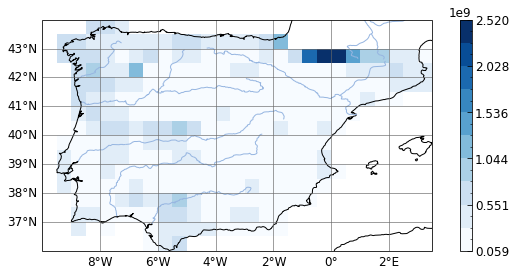

In [31]:
#Display map of var for ds
var='runoff'
ds = ip_natDIAG_noirr_month
vmin=0
vmax=2
vmin, vmax = None, None
cmap=blues
map_ave(ds, var, cmap=cmap, vmin=vmin, vmax=vmax)

Text(0.5, 1.0, 'Interp_topo routing (0.5° DEM)')

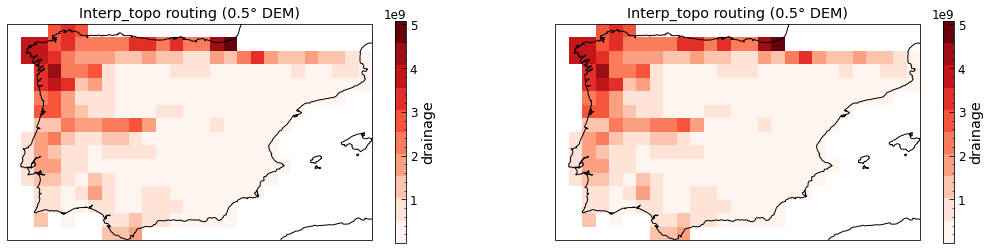

In [32]:
# Display map of var for 2 sims
var = 'drainage'
max_val=None

# ds_std = ip_std_noirr_month
ds_std = ip_natDIAGR_noirr_month
ds_nat = ip_natDIAG_noirr_month

plotvar_std = ds_std[var].mean(dim='time')
plotvar_std=plotvar_std.where(plotvar_std>0)
plotvar_nat = ds_nat[var].mean(dim='time')
plotvar_nat=plotvar_nat.where(plotvar_nat>0)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 4), subplot_kw={'projection': ccrs.PlateCarree()})
# fig.suptitle(ds_std[var].long_name + ' average over the period (2003-2012, {})'.format(ds_std[var].units))

# Plot for std dataset
axs[0].coastlines()
plotvar_std.plot(ax=axs[0], transform=ccrs.PlateCarree(), cmap=reds, vmax=max_val)
axs[0].set_title(f'{ds_std.name}')

# Plot for natORC dataset
axs[1].coastlines()
plotvar_nat.plot(ax=axs[1], transform=ccrs.PlateCarree(), cmap=reds, vmax=max_val)
axs[1].set_title(f'{ds_nat.name}')

In [ ]:
#Diff map
var='drainage'
ds1=ip_natDIAG_noirr_month
# ds2=ip_std_noirr_month
ds2=ip_natDIAGR_noirr_month

vmin=-20
vmax= 20
vmin, vmax = None, None
cmap=emb_neutral
#compute diff between ds1 and ds2
map_diff_ave(ds1, ds2, var, vmin=vmin, vmax=vmax, cmap=cmap)
# map_rel_diff_ave(ds1, ds2, var, vmin=vmin, vmax=vmax, cmap=cmap)

No significance mask applied


runoff RMSE (Interp_topo routing (0.5° DEM)-Interp_topo routing (0.5° DEM), spatial and temporal mean) : 5.145911059447674e-06


AttributeError: 'DataArray' object has no attribute 'long_name'

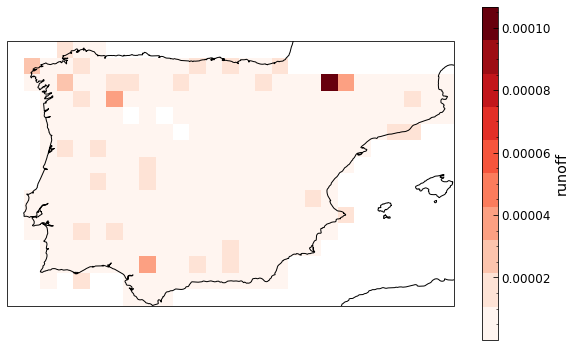

In [30]:
#RMSE map
var='runoff'
# ds1=ip_std_noirr
# ds2=ip_natORC_noirr
ds1 = ip_natDIAG_noirr_month
ds2 = ip_natDIAGR_noirr_month
#compute RMSE between ds1 and ds2
rmse = np.sqrt(((ds1[var]-ds2[var])**2).mean(dim='time'))
rel_rmse = rmse/ds2[var].mean(dim='time')

#output the value of the rmse after spatial averaging over all grid points
print(var + ' RMSE (' + ds1.name + '-' + ds2.name+ ', spatial and temporal mean) : ' + str(rmse.mean(dim=['lon','lat']).values))

#display map of rmse
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
rmse.where(rmse>0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap=reds)
# plt.title(ds1[var].long_name + ' average RMSE  (' + ds1.name + ' - ' + ds2.name + ')')
plt.title(ds1[var].long_name + ' average RMSE')

In [ ]:
#RMSE and rRMSE values for multiple variables
varlist=['streamr', 'fastr', 'slowr']
# varlist=['drainage', 'runoff']
ds1=ip_natORC_noirr
ds2=ip_std_noirr
#compute RMSE between ds1 and ds2
for var in varlist:
    rmse = np.sqrt(((ds1[var]-ds2[var])**2).mean(dim='time'))
    # rel_rmse = rmse/ds2[var].mean(dim='time')
    #output the value of the rmse after spatial averaging over all grid points
    print(var + ' RMSE (' + ds1.name + '-' + ds2.name+ ', spatial and temporal mean) : ' + str((rmse.mean(dim=['lon','lat']).values)))
    # print(var + ' rRMSE (' + ds1.name + '-' + ds2.name+ ', spatial and temporal mean) : ' + str((rel_rmse.mean(dim=['lon','lat']).values)))

# Time series

In [ ]:
#Average time series
var='streamr'
year_min=2000
year_max=2012

ds1 = ip_std_noirr_month
ds2 = ip_natORC_noirr_month
ds_list=[ds1, ds2]

time_series_ave(ds_list, var, 
                year_min=year_min, year_max=year_max
                )

In [ ]:
var='streamr'
year_min=2003
year_max=2012

vmin=0
vmax=2
vmin, vmax = None, None

ds1 = ip_std_noirr_month
ds2 = ip_natORC_noirr_month
ds_list=[ds1, ds2]

seasonal_cycle_ave(ds_list, var, vmin=vmin, vmax=vmax,
                   year_min=year_min, year_max=year_max,
                   )

# Hydrographs en un point

In [ ]:
river_coordinates = {
    'Ebre': {'lon': 0.75, 'lat': 40.75},
    'Tage': {'lon': -9.25, 'lat': 39.25},
    'Douro': {'lon': -8.75, 'lat': 41.25},
    'Guadiana': {'lon': -7.25, 'lat': 38.25},
    'Guadalquivir': {'lon': -6.25, 'lat': 36.75},
    'Minho': {'lon': -8.75, 'lat': 42.25}
}

In [ ]:
#Time series
year_min=2003
year_max=2011
# Douro
lon=-8.75
lat=41.25

var="hydrographs"
ds1=std
ds1 = ds1.where(ds1['time.year'] >= year_min, drop=True).where(ds1['time.year'] <= year_max, drop=True)
ds2=natDIAGR_noirr
ds2 = ds2.where(ds2['time.year'] >= year_min, drop=True).where(ds2['time.year'] <= year_max, drop=True)
#plot the time series of hydrographs at the point (lon,lat)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ax.set_ylabel('hydrographs')
ds1[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds1.name)
ds2[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds2.name)
# ds2['runoff'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='runoff')
plt.title('hydrographs at (' + str(lon) + ',' + str(lat) + '), m³/s')
plt.legend()

In [ ]:
#Time series
year_min=2010
year_max=2011
ds1=std
ds1 = ds1.where(ds1['time.year'] >= year_min, drop=True).where(ds1['time.year'] <= year_max, drop=True)
#plot the time series of hydrographs at the point (lon,lat)
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ds1['runoff'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='runoff',c='green')
ds1['drainage'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='drainage',c='brown')
ds1['rain'].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label='rainfall',c='blue')
plt.title('Runoff and drainage at (' + str(lon) + ',' + str(lat) + '), mm/d')
plt.legend()

In [ ]:
#Cycle saisonnier (moyenne par jour de l'année)
var="hydrographs"
#Ebre
# lon=0.75
# lat=40.75
# # Tage
# lon=-9.25
# lat=39.25
# # Douro
# lon=-8.75
# lat=41.25
# # Guadiana
lon=-7.25
lat=38.25
# # Guadalquivir
# lon=-6.25
# lat=36.75
ds1=std
ds2=natDIAGR_noirr
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.grid()
ax.set_xlabel('month')
ax.set_ylabel('hydrographs')
ax.set_title('hydrographs at (' + str(lon) + ',' + str(lat) + ')')
#compute the annual cycle of hydrographs at the point (lon,lat)
ds1[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.dayofyear').mean(dim='time').plot(ax=ax, label=ds1.name)
ds2[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.dayofyear').mean(dim='time').plot(ax=ax, label=ds2.name)
plt.legend()

In [ ]:
#cycle saisonnier pour 6 points de grille
var = "hydrographs"
ds1 = std
ds2 = natDIAGR_noirr

# Create subplots for each river in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over rivers and plot hydrographs
for i, (river, coordinates) in enumerate(river_coordinates.items()):
    lon = coordinates['lon']
    lat = coordinates['lat']
    
    ax = axes[i]

    # Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
    ds1[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds1.name)
    ds2[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds2.name)
    
    ax.legend()
    #set subplot title to river name
    ax.set_title(river)

# Remove any remaining empty subplots
for i in range(len(river_coordinates), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("River discharge seasonnal cycle (m³/s, 2003-2012)")
plt.tight_layout()

In [ ]:
#cycle saisonnier pour 6 stations
var = "hydrographs"
ds1 = std
ds2 = natDIAGR_noirr_month

# Create subplots for each river in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over rivers and plot hydrographs
# for i, (station, coordinates) in enumerate(stations_merit.items()):
#     lon = coordinates['lon']
#     lat = coordinates['lat']
    
#     ax = axes[i]

#     # Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
#     ds1[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds1.name)
#     ds2[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds2.name)
    
#     ax.legend()
#     #set subplot title to river name
#     ax.set_title(river)

for i, (key, coordinates) in enumerate(stations_merit.items()):
    ax=axes[i]
    mask = (stations['number'] == key)
    station = stations.sel(stations=mask)
    #remove years before 2003 and after 2012
    station = station.where((station['time.year'] >= coordinates['year_min']), drop=True)
    station = station.where((station['time.year'] <= coordinates['year_max']), drop=True)
    ax.plot(station['time'],station['mergedhydro'], label='obs', c='black')

    lon = coordinates['lon_grid']
    lat = coordinates['lat_grid']
    ds1[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds1.name)
    ds2[var].sel(lon=lon, lat=lat, method='nearest').plot(ax=ax, label=ds2.name)

    ax.set_title(coordinates['name'])
    ax.set_ylabel('discharge [m3/s]')
    ax.legend()

# Remove any remaining empty subplots
for i in range(len(river_coordinates), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("River discharge time series (m³/s)")
plt.tight_layout()

In [ ]:
#cycle saisonnier pour 6 stations
var = "hydrographs"
ds1 = std
ds2 = natDIAGR_noirr

# Create subplots for each river in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over rivers and plot hydrographs
# for i, (station, coordinates) in enumerate(stations_merit.items()):
#     lon = coordinates['lon']
#     lat = coordinates['lat']
    
#     ax = axes[i]

#     # Compute the annual cycle of hydrographs at the point (lon, lat) for each dataset
#     ds1[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds1.name)
#     ds2[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds2.name)
    
#     ax.legend()
#     #set subplot title to river name
#     ax.set_title(river)

for i, (key, coordinates) in enumerate(stations_merit.items()):
    ax=axes[i]

    lon = coordinates['lon_grid']
    lat = coordinates['lat_grid']
    ds1[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds1.name)
    ds2[var].sel(lon=lon, lat=lat, method='nearest').groupby('time.month').mean(dim='time').plot(ax=ax, label=ds2.name)


    mask = (stations['number'] == key)
    station = stations.sel(stations=mask)
    #remove years before 2003 and after 2012
    station = station.where((station['time.year'] >= coordinates['year_min']), drop=True)
    station = station.where((station['time.year'] <= coordinates['year_max']), drop=True)
    station = station.groupby('time.month').mean()
    ax.plot(station['month'],station['mergedhydro'], label='obs', c='black')

    ax.set_title(coordinates['name'])
    ax.set_ylabel('discharge [m3/s]')
    #add months name to x-axis ticks
    months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    ax.set_xticks(np.arange(1,13))
    ax.set_xticklabels(months)
    ax.legend()

# Remove any remaining empty subplots
for i in range(len(river_coordinates), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("River discharge seasonnal cycle (m³/s, 2003-2012)")
plt.tight_layout()